<a href="https://colab.research.google.com/github/DaudRaza-NUST/DL-Assignment4/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **<center>Assignment#4<br />Daud Raza<br />401920**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 6s 0us/step


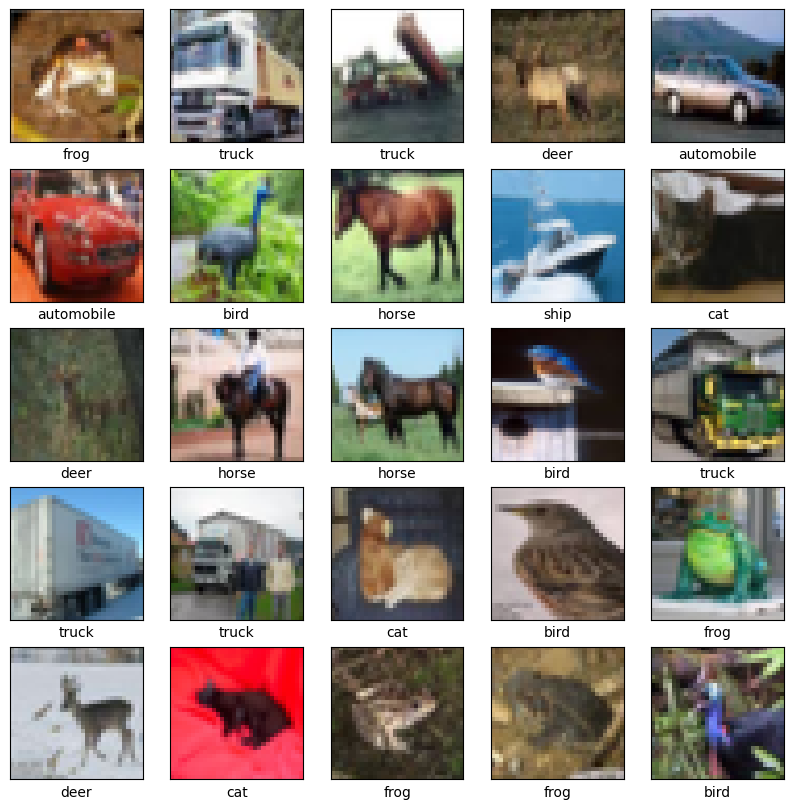

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# <center>1. Using Only Convolution Layers</center>

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', padding="valid", input_shape=(32, 32, 3)))
model.add(layers.Conv2D(24, (3, 3), activation='relu', padding="valid"))
model.add(layers.Conv2D(36, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(48, (5, 5), activation='relu', padding="valid"))
model.add(layers.Conv2D(36, (7, 7), activation='relu', padding="same"))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(36, (7, 7), activation='relu', padding="same"))
model.add(layers.Conv2D(64, (9, 9), activation='relu'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 24)        1752      
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 36)        7812      
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 48)        43248     
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 36)        84708     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 36)        63540     
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        1

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 24)        1752      
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 36)        7812      
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 48)        43248     
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 36)        84708     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 36)        63540     
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        1

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 29s 10ms/step - loss: 1.7485 - accuracy: 0.3443 - val_loss: 1.5231 - val_accuracy: 0.4438
Epoch 2/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3580 - accuracy: 0.5106 - val_loss: 1.2748 - val_accuracy: 0.5465
Epoch 3/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1819 - accuracy: 0.5783 - val_loss: 1.1254 - val_accuracy: 0.6003
Epoch 4/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0720 - accuracy: 0.6195 - val_loss: 1.0908 - val_accuracy: 0.6167
Epoch 5/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9861 - accuracy: 0.6503 - val_loss: 1.0437 - val_accuracy: 0.6358
Epoch 6/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9234 - accuracy: 0.6725 - val_loss: 1.0149 - val_accuracy: 0.6511
Epoch 7/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8636 - accuracy: 0.6939 - val_loss: 1.0350 - val_a

313/313 - 1s - loss: 1.4546 - accuracy: 0.6504 - 1s/epoch - 4ms/step


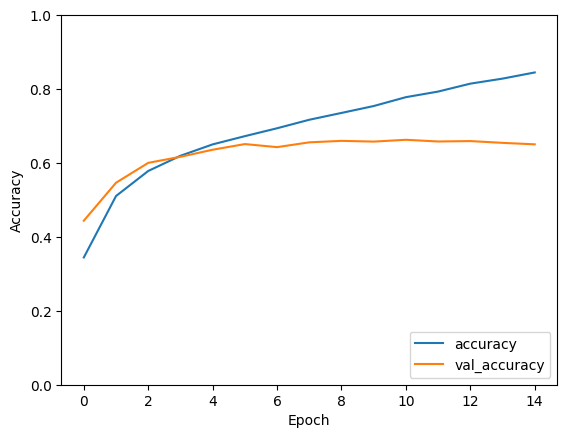

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.6503999829292297


# <center>2. Conv2d+Maxpooling</center>

## Variation no. 1

In [ ]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(8, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 3)))
model_2.add(layers.Conv2D(24, (3, 3), activation='relu', padding="same"))
model_2.add(layers.MaxPooling2D((2, 2), padding="valid", strides=(1,1)))
model_2.add(layers.Conv2D(36, (3, 3), activation='relu', padding="same"))
model_2.add(layers.Conv2D(48, (5, 5), activation='relu', padding="same"))
model_2.add(layers.MaxPooling2D((2, 2), padding="valid", strides=(1,1)))
model_2.add(layers.Conv2D(36, (7, 7), activation='relu', padding="same"))
model_2.add(layers.Conv2D(36, (7, 7), activation='relu', padding="same"))
model_2.add(layers.MaxPooling2D((2, 2), padding="valid"))
model_2.add(layers.Conv2D(64, (9, 9), activation='relu'))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(10))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 8)         224       
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 24)        1752      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 24)        0         
 D)                                                              
                                                                 
 conv2d_9 (Conv2D)           (None, 31, 31, 36)        7812      
                                                                 
 conv2d_10 (Conv2D)          (None, 31, 31, 48)        43248     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 48)        0         
 g2D)                                                 

In [ ]:
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_2.fit(train_images, train_labels, epochs=15,
                    validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 27s 15ms/step - loss: 1.6893 - accuracy: 0.3743 - val_loss: 1.3107 - val_accuracy: 0.5313
Epoch 2/15
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2528 - accuracy: 0.5475 - val_loss: 1.2781 - val_accuracy: 0.5453
Epoch 3/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1161 - accuracy: 0.6034 - val_loss: 1.1016 - val_accuracy: 0.6087
Epoch 4/15
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0206 - accuracy: 0.6353 - val_loss: 1.0489 - val_accuracy: 0.6234
Epoch 5/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9544 - accuracy: 0.6576 - val_loss: 1.0661 - val_accuracy: 0.6273
Epoch 6/15
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9002 - accuracy: 0.6801 - val_loss: 0.9558 - val_accuracy: 0.6733
Epoch 7/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8450 - accuracy: 0.6981 - val_loss: 0.9819 -

313/313 - 2s - loss: 1.1521 - accuracy: 0.6719 - 2s/epoch - 6ms/step


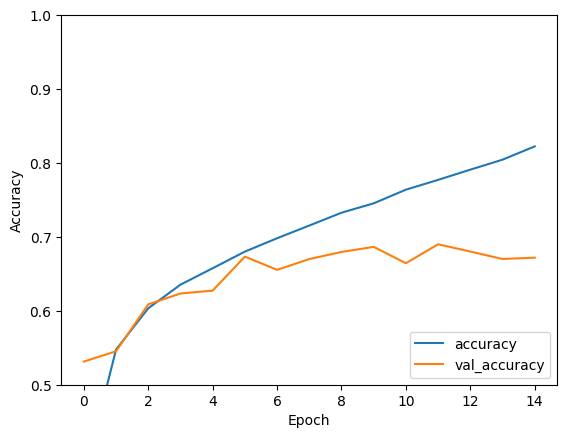

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_2.evaluate(test_images,  test_labels, verbose=2)

# <center> Alexnet Computation Memory & Time </center>




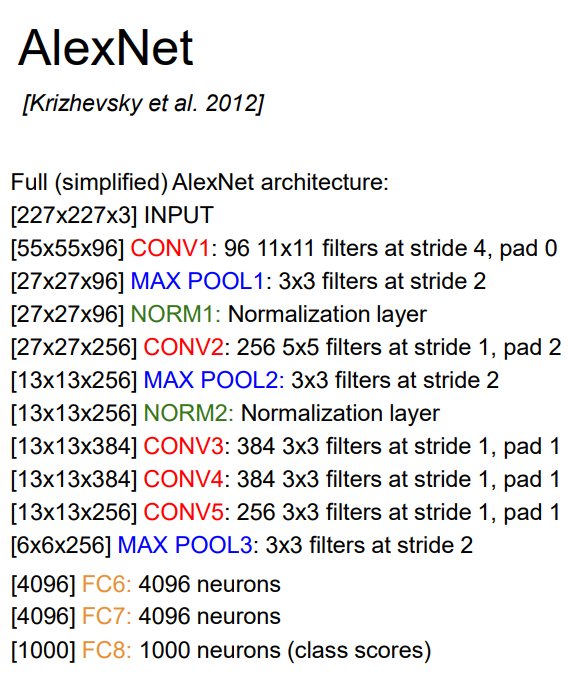

### <div style="text-align: justify">Input: 227x227x3&nbsp;&nbsp;&nbsp;&nbsp;Memory: 154,587&nbsp;&nbsp;&nbsp;&nbsp;Parameters: 0 <br /> Conv1: 55x55x96&nbsp;&nbsp;&nbsp;&nbsp;Memory: 290,400&nbsp;&nbsp;&nbsp;&nbsp;Parameters: 11,616 <br />Maxpool: 27x27x96&nbsp;&nbsp;&nbsp;&nbsp;Memory: 69,984&nbsp;&nbsp;&nbsp;&nbsp;Parameters: 0 <br />Norm Layer: 27x27x96&nbsp;&nbsp;&nbsp;&nbsp;Memory: 69,984&nbsp;&nbsp;&nbsp;&nbsp;Parameters: 0 <br />Conv2: 27x27x256&nbsp;&nbsp;&nbsp;&nbsp;Memory: 186,624&nbsp;&nbsp;&nbsp;&nbsp;Parameters: 6400 <br />Maxpool: 13x13x256&nbsp;&nbsp;&nbsp;&nbsp;Memory: 43,264&nbsp;&nbsp;&nbsp;&nbsp;Parameters: 0 <br />Norm Layer: 13x13x256&nbsp;&nbsp;&nbsp;&nbsp;Memory: 43,264&nbsp;&nbsp;&nbsp;&nbsp;Parameters: 0 <br />Conv3: 13x13x384&nbsp;&nbsp;&nbsp;&nbsp;Memory: 64,896&nbsp;&nbsp;&nbsp;&nbsp;Parameters: 3,456 <br />Conv4: 13x13x384&nbsp;&nbsp;&nbsp;&nbsp;Memory: 64,896&nbsp;&nbsp;&nbsp;&nbsp;Parameters: 3,456 <br />Conv5: 13x13x256&nbsp;&nbsp;&nbsp;&nbsp;Memory: 43,264&nbsp;&nbsp;&nbsp;&nbsp;Parameters: 2,304 <br />Maxpool: 6x6x256&nbsp;&nbsp;&nbsp;&nbsp;Memory: 9,216&nbsp;&nbsp;&nbsp;&nbsp;Parameters: 0 <br />FC6: 6x6x256x4096&nbsp;&nbsp;&nbsp;&nbsp;Memory: 4096&nbsp;&nbsp;&nbsp;&nbsp;Parameters: 37,748,736 <br />FC7: 4096x4096&nbsp;&nbsp;&nbsp;&nbsp;Memory: 4096&nbsp;&nbsp;&nbsp;&nbsp;Parameters: 16,777,216 <br />FC6: 1000x4096&nbsp;&nbsp;&nbsp;&nbsp;Memory: 1000&nbsp;&nbsp;&nbsp;&nbsp;Parameters: 4,096,000 <br />Total Parameters: 58,649,184<br />Total Memory: 1,049,751 x 4 bytes = 4.2 MB</div>

# **Computing Time for i3 1st gen system with 4GB RAM.**

## Method 1

### The peak clock speed of an i3 is 3.06 GHz and it has 2 cores. <br /> Let us assume different processes are consuming around half of the RAM and the available clock speed is 2.5 GHz.  <br /><br />The total memory for one forward/back pass is 4.2 MB for AlexNet. Let's say that our model runs for 15 epochs. That would be a total of 30 passes (forward & backward). The total memory consumption comes out to be 126 MB. <br /><br /> For first case, let us assume that each instruction is processed sequentially. Given that there are 1,049,751 instructions for one pass, the total number of instructions amounts to 31,492,530. It takes 1/2,500,000,000 of a sec to process a single instruction, thus the total time would come up to 0.012597s to process a single image. <br /><br /> Lets assume that AlexNet is applied on a dataset of 10,000 images. Given that we now have the time needed to process one image, the total time for learning of this instance of AlexNet would be 126s or 2 mins approximately. <br /><br /> Now lets assume we are using all cores (2 in this case). That effectively means its running 2 instructions at the same time. If all the threads are engaged as well (4 threads), that would enable the system to execute 4 commands at the same time, while still processing 2 at the same time. This would roughly bring down the time to less than half, approximately between 40-60s.

## Method 2

### The second and more traditional method is to run the program directly and measure the time taken for a single epoch. This would allow us to extrapolate the approximate time taken for the entire operation. However, as the system mentioned for this calculation is not present on hand, it is not feasible to find the actual time.

In [ ]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/ColabNotebooks/Assignment#4

[NbConvertApp] Converting notebook /content/drive/MyDrive/ColabNotebooks/Assignment#4 to html
[NbConvertApp] Writing 1056948 bytes to /content/drive/MyDrive/ColabNotebooks/Assignment#.html
